In [114]:
#Joining the clean.ipynb notebook to this notebook
import import_ipynb
import clean

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text


df_main=clean.df_dropped

In [115]:
df_main['Dietary_Habits'].value_counts()
df_grouped=df_main.groupby('Dietary_Habits')[['LDL_Cholesterol','HDL_Cholesterol']].agg('mean').reset_index().copy()
df_grouped

,Dietary_Habits,LDL_Cholesterol,HDL_Cholesterol
0,Gluten-Free,123.471483,55.820342
1,Keto,126.102795,55.110911
2,Non-Vegetarian,123.834220,55.434397
3,Paleo,125.566421,54.818266
4,Pescatarian,124.410632,55.000917
5,Vegan,125.134301,55.011797
6,Vegetarian,127.668170,55.171326


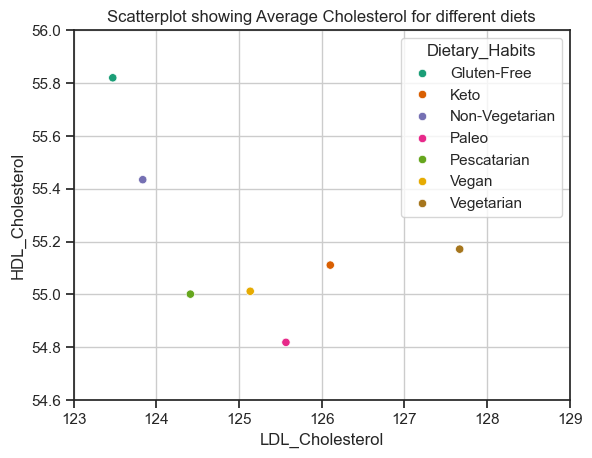

In [116]:

sns.scatterplot(data=df_grouped,x='LDL_Cholesterol',y='HDL_Cholesterol',hue="Dietary_Habits",palette='Dark2')
plt.xlim(123,129)
plt.ylim(54.6,56)
plt.title('Scatterplot showing Average Cholesterol for different diets')
plt.grid(visible=True)


In [117]:
#Finding out relationship between Systolic_BP and different Symptoms.

df_exploded=clean.df_dropped.explode('Symptoms')
df_exploded

,Patient_Name,Patient_ID,Patient_Age,Patient_Gender,Record_Date,Dietary_Habits,LDL_Cholesterol,Work_Type_of_patient,Metabolic_Equivalent_of_Task_Score,Marital_Status,...,Hypertension,Family_History_of_Stroke,Diagnosis,Residence_Type,Systolic_BP,Smoking_Status,Diastolic_BP,Stroke_History,Symptoms,Blood_Pressure_Levels
0,Reyansh Manda,26694,50.0,Male,2023-05-16,Pescatarian,156.0,Government Job,6,Divorced,...,1,Yes,No Stroke,Rural,94.0,Non-smoker,82.0,0,Confusion,94/82
1,Lavanya Dutt,905,23.0,Male,2020-04-24,Gluten-Free,67.0,Private,7,Single,...,0,Yes,No Stroke,Urban,152.0,Currently Smokes,103.0,1,Dizziness,152/103
2,Manjari Ramakrishnan,12824,89.0,Male,2021-10-29,Vegetarian,156.0,Never Worked,8,Divorced,...,0,No,No Stroke,Urban,140.0,Currently Smokes,69.0,1,Difficulty Speaking,140/69
2,Manjari Ramakrishnan,12824,89.0,Male,2021-10-29,Vegetarian,156.0,Never Worked,8,Divorced,...,0,No,No Stroke,Urban,140.0,Currently Smokes,69.0,1,Weakness,140/69
2,Manjari Ramakrishnan,12824,89.0,Male,2021-10-29,Vegetarian,156.0,Never Worked,8,Divorced,...,0,No,No Stroke,Urban,140.0,Currently Smokes,69.0,1,Difficulty Speaking,140/69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,Anvi Mannan,22343,73.0,Male,2023-05-30,Paleo,91.0,Self-employed,9,Single,...,0,Yes,No Stroke,Urban,157.0,Non-smoker,74.0,0,Numbness,157/74
7673,Anvi Mannan,22343,73.0,Male,2023-05-30,Paleo,91.0,Self-employed,9,Single,...,0,Yes,No Stroke,Urban,157.0,Non-smoker,74.0,0,Confusion,157/74
7673,Anvi Mannan,22343,73.0,Male,2023-05-30,Paleo,91.0,Self-employed,9,Single,...,0,Yes,No Stroke,Urban,157.0,Non-smoker,74.0,0,Dizziness,157/74
7673,Anvi Mannan,22343,73.0,Male,2023-05-30,Paleo,91.0,Self-employed,9,Single,...,0,Yes,No Stroke,Urban,157.0,Non-smoker,74.0,0,Loss of Balance,157/74


In [118]:
df_diagnosis=df_exploded[df_exploded['Diagnosis'] =='Stroke'].copy()

symptoms_stats=df_diagnosis.groupby('Symptoms').agg(
    symptoms_count=('Diagnosis', 'count')
).copy()
symptoms=10
symptoms_stats=symptoms_stats.sort_values(by='symptoms_count',ascending=False).head(symptoms)
symptoms_stats


,symptoms_count
Symptoms,
Blurred Vision,828
Dizziness,802
Difficulty Speaking,791
Loss of Balance,790
Confusion,787
Seizures,780
Numbness,776
Headache,768
Severe Fatigue,762


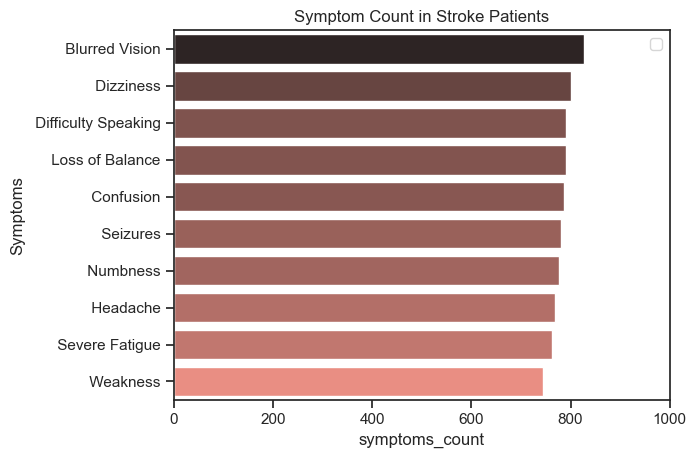

In [119]:
sns.set_theme(style='ticks')
sns.barplot(data=symptoms_stats,x='symptoms_count', y='Symptoms',hue='symptoms_count',palette='dark:salmon_r')
plt.legend('')
plt.xlim(0,1000)
plt.title('Symptom Count in Stroke Patients')
plt.show()

In [120]:
df_main[['Hypertension']].value_counts()


Hypertension
0               5799
1               1876
Name: count, dtype: int64

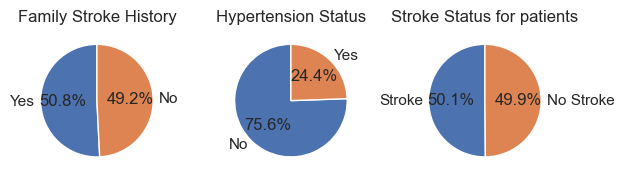

In [126]:
fig,ax =plt.subplots(1,3)

dict_column ={
    'Family_History_of_Stroke':'Family Stroke History',
    'Hypertension':'Hypertension Status',
    'Diagnosis':'Stroke Status for patients'
}
labels_list = [
    ('Yes', 'No'),   
    ('No', 'Yes'),
    ('Stroke', 'No Stroke')
]

for i, (column,title) in enumerate (dict_column.items()):
         ax[i].pie(df_main[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=labels_list[i])
         ax[i].set_title(title)
plt.tight_layout()
